#### k-대푯값 군집 분석
* K-평균 군집 분석은 클러스터 안에서 다른 오브젝트에 비해 거리가 먼 오브젝트의 영향력이 크기 때문에 아웃라이어에 매우 민감함 --> 아웃라이어가 존재 시 클러스터 중심을 계산할 때 평균값이 크게 왜곡될 수 있고 한번 잘못 계산한 중심은 다른 오브젝트들을 배정할 때도 반영되어 전체적으로 악영향을 끼침
   * 아웃라이어 : 보통의 값보다 특이한 값
   * 아웃라이어에 강한 것기 대푯값 군집 분석이다.
   
* K-대푯값 군집 분석은 이상치의 영향을 덜 받게 되지만, 분석 시 반복횟수가 많아지게 되어 시간이 오래 걸린다는 단점이 있음
* pip install pyclustering

In [1]:
# K-대푯값 군집 분석
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from pyclustering.cluster import kmedoids
import numpy as np

In [2]:
hannanum = Hannanum()
news_data = pd.read_csv("C:/Users/330-15/Desktop/20_1_computer/SocialWebMining/Crawling/corona_mask_dust.csv"
                        , engine = 'python', encoding='utf-8')
news_data

,인덱스,검색어,날짜,신문사,제목,내용
0,1,유한양행,2020.05.29,inews24.com,"[I-리포트] 유한양행, 하반기 개선 기대…목표가↑-현대차證",[아이뉴스24 한수연 기자] 현대차증권은 29일 유한양행에 대해 올해 1분기에는 코...
1,2,유한양행,2020.05.28,헤럴드경제,"화이자-유한양행, ‘평생 금연서약 캠페인’ 진행",[헤럴드경제=손인규 기자]한국화이자제약(대표이사 사장 오동욱)은 유한양행(대표이사 ...
2,3,유한양행,2020.05.24,서울경제,코로나 특수 유한양행 '락스' 매출 27% 급증,1분기 실적악화 그나마 상쇄매출 비중도 8.6%로 높아져[서울경제] 신종 코로나바이...
3,4,유한양행,2020.05.23,edaily,[주말n입사지원] 유한양행·한샘·위메프 등 채용소식,유한양행·한샘·LS일렉트릭·GS에너지·위메프 등 채용소식(사진=연합뉴스)[이데일리 ...
4,5,유한양행,2020.05.22,서울신문,"유한양행, 혈액이 ‘팽팽’… 생활이 힘차져요",[서울신문]체내 흡수가 빠른 액상형으로 된 유한양행의 대표 마그네슘·비타민B 영양제...
5,6,유한양행,2020.05.21,donga.com,"성균관대-유한양행, ‘뇌질환 R&BD; 생태계’ 구축 협력사업 협약체결","성균관대는 유한양행, ㈜아임뉴런바이오사이언스와 ‘산학융합 뇌질환 R&BD 생태계 구..."
6,7,유한양행,2020.05.21,세계닷컴,유한양행-성균관대-아임뉴런 맞손…뇌질환 R&BD; 생태계 구축한다,"㈜유한양행(이정희 대표이사 사장)은 성균관대학교(신동렬 총장), ㈜아임뉴런바이오사이..."
7,11,라돈,2020.05.17,조선일보,"지하수 함유 라돈, 공기공급 장치로 85% 저감효과","충북보건연구원, 지하수 함유 라돈 공기 공급으로 저감 효과청주 충주 음성 보은 옥천..."
8,12,라돈,2020.05.17,뉴시스,"충북보건환경연구원, 지하수 라돈 급수과정서 평균 44% 자연 감소",【청주=뉴시스】충북도 보건환경연구원 전경. (사진=연구원 제공) photo@news...
9,13,라돈,2020.05.17,뉴스1,"지하수 함유 라돈, 급수과정서 평균 44% 자연감소",간단히 공기공급만 해도 제거 가능청주·충주·음성·진천·괴산·보은·옥천 방사성물질 높...


In [3]:
docs = []
for i in news_data['내용']:
    docs.append(hannanum.nouns(i))
    
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

vec = CountVectorizer()
X = vec.fit_transform(docs)

df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [4]:
# initial_index_medoids의 인자에 초기 대표 오브젝트를 입력해주어야 하는데
# numpy 라이브러리의 randint 함수를 이용해서 0~14중 임의의 정수를 3개를 뽑음
# 완벽하게 잘 분류하지 못함
kmedoids_instance = kmedoids.kmedoids(df.values,
                                    initial_index_medoids=np.random.randint(15, size=3))

kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
clusters

[[6, 5], [18, 0, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [1, 17]]

#### 구조적 군집 분석
* 데이터 오브젝트를 트리 형태의 군집으로 나눔
* 계층적 군집 분석 덴드로그램

##### 거리 측정법
* 최소거리와 최대거리
   * 최소거리는 두 군집에서 가장 가까운 오브젝트들을 연결하면서 전체적인 계층을 형성함
   * 최대거리는 두 군집에서 가장 먼 오브젝트들을 연결하면서 전체적인 계층을 형성함
   * 최소거리와 최대거리는 아웃라이어나 노이즈에 상대적으로 민감함
* 평균거리
   * 두 군집의 중심점(평균점) 간의 거리로 계층을 생성해가며 계산과정이 비교적 간단하다는 장점이 있음
* 거리평균
   * 군집 간 각 오브젝트 간의 거리를 모두 합한 후 오브젝트 조합 개수로 나누어 거리를 계산함
   * 벡터를 계산하기 어려운 정성적인 데이터들에게도 적용 가능하다는 장점이 있음
* Word 측정법
   * 군집 내 증분과 군집 간 제곱합을 동시에 고려하여 거리를 산출함
   * 아웃라이어나 노이즈에 덜 민감하며 비슷한 크기의 군집끼리 묶어주는 경향이 있음
 

In [5]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

hannanum = Hannanum()
news_data = pd.read_csv("C:/Users/330-15/Desktop/20_1_computer/SocialWebMining/Crawling/corona_mask_dust.csv"
                        , engine = 'python', encoding='utf-8')
news_data.head()

,인덱스,검색어,날짜,신문사,제목,내용
0,1,유한양행,2020.05.29,inews24.com,"[I-리포트] 유한양행, 하반기 개선 기대…목표가↑-현대차證",[아이뉴스24 한수연 기자] 현대차증권은 29일 유한양행에 대해 올해 1분기에는 코...
1,2,유한양행,2020.05.28,헤럴드경제,"화이자-유한양행, ‘평생 금연서약 캠페인’ 진행",[헤럴드경제=손인규 기자]한국화이자제약(대표이사 사장 오동욱)은 유한양행(대표이사 ...
2,3,유한양행,2020.05.24,서울경제,코로나 특수 유한양행 '락스' 매출 27% 급증,1분기 실적악화 그나마 상쇄매출 비중도 8.6%로 높아져[서울경제] 신종 코로나바이...
3,4,유한양행,2020.05.23,edaily,[주말n입사지원] 유한양행·한샘·위메프 등 채용소식,유한양행·한샘·LS일렉트릭·GS에너지·위메프 등 채용소식(사진=연합뉴스)[이데일리 ...
4,5,유한양행,2020.05.22,서울신문,"유한양행, 혈액이 ‘팽팽’… 생활이 힘차져요",[서울신문]체내 흡수가 빠른 액상형으로 된 유한양행의 대표 마그네슘·비타민B 영양제...


In [16]:
docs = []
for i in news_data['내용']:
    docs.append(hannanum.nouns(i))

for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])
    
vec = CountVectorizer()
X = vec.fit_transform(docs)

df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(df)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
      dtype=int64)

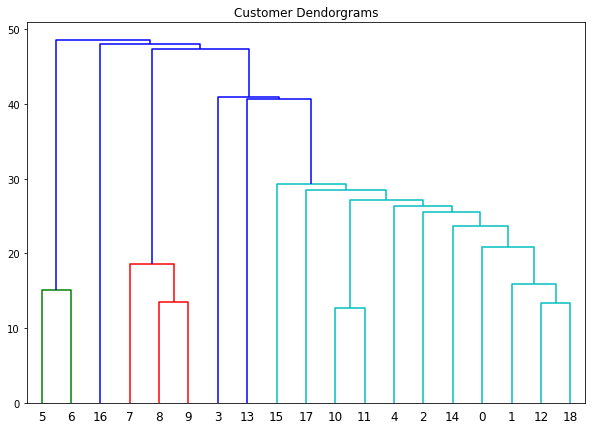

In [17]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendorgrams")
dend = shc.dendrogram(shc.linkage(df, method='ward'))